# IM939 Lab 5 - Part 1

## Workflow

Our labs have focused on data analysis. The goal here is to try and understand informative patterns in our data. These patterns allow us to answer questions.

To do this we:

1. Read data into Python.
2. Look at our data. 
3. Wrangling our data. Often exploring raw data and dealing with missing values (imputation techniques), transformaing, normalising, standardising, outliers or reshaping.
4. Carry out a series of analysis to better understand our data via clustering, regressions analysis, dimension reduction, and many other techniques.
5. Reflect on what the patterns in our data can tell us.

These are not mutually exclusive processes and are not exhaustive. One may review our data after cleaning, load in more data, carry out additional analysis and/or fit multiple models, tweak data summaries or adopt new techniques. Reflecting on the patterns are in our data can give way to additional analysis and processing.

## So far

A quick reminder, our toolkit comprises of:

* [Pandas](https://pandas.pydata.org/) - table like data structures. Packed with methods for summarising and manipulating data. [Documentation](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro). [Cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).
* [Seaborn](https://seaborn.pydata.org/) - helping us create statistical data visualisations. [Tutorials](https://seaborn.pydata.org/tutorial.html).
* [Scikit-learn](https://scikit-learn.org/stable/index.html) - An accessible collection of functions and object for analysing data. These analysis include dimension reduction, clustering, regressions and evaluating our models. [Examples](https://scikit-learn.org/stable/auto_examples/index.html).

These tools comprise some of the core Python data science stack and allow us to tackle many of the elements from each week.

Week 2
Tidy data, data types, wrangling data, imputation ([missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)), transformations.

Week 3
[Descriptive statistics](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html), distributions, models (e.g., [regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)).

Week 4
Feature selection, dimension reduction (e.g., [Principle Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [Multidimensional scaling](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html?highlight=mds#sklearn.manifold.MDS), [Linear Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#:~:text=sklearn.discriminant_analysis.LinearDiscriminantAnalysis%C2%B6.%20Linear%20Discriminant%20Analysis.%20A%20classifier%20with%20a,that%20all%20classes%20share%20the%20same%20covariance%20matrix.), [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNE), Correspondance Analysis), [clustering](https://scikit-learn.org/stable/modules/clustering.html) (e.g., [Hierarchical Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering), Partioning-based clustering such as [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#:~:text=sklearn.cluster%20.KMeans%20%C2%B6%20%20,fit%20%28X%203%20more%20rows%20)).

We have also encountered two dataset sources.

* [sklearn example datasets](https://scikit-learn.org/stable/datasets/index.html#:~:text=The%20sklearn.datasets%20package%20embeds%20some%20small%20toy%20datasets,on%20data%20that%20comes%20from%20the%20%E2%80%98real%20world%E2%80%99.)
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php)

You can learn a lot by picking a dataset, choosing a possible research question and carrying a series of analysis. I encourage you to do so outside of the session. It certainly forces one to read the documentation and explore the wonderful possabilities.

## This week

Trying to understand patterns in data often requires us to fit multiple models. We need to consider how well a given model (a kmeans cluster, a linear regression, dimension reduction, etc.) performs.

Specifically, we will look at:

1. Comparing clusters to the 'ground truth' - the wine dataset
2. Cross validation of linear regression - the crime dataset
3. Investigating multidimensional scaling - the london borough dataset
4. Visualising the overlap in clustering results


### Clustering and ground truth

Load in the wine dataset. Details of the dataset are [here]https://archive.ics.uci.edu/ml/datasets/wine).

In [1]:
import pandas as pd

df = pd.read_csv('wine.csv')

Look at our data.

In [2]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


There is a column called Class label that gives us the ground truth. The wines come from three different cultivars. Knowing the actual grouping helps us to identify how well our methods can capture this ground truth.

Following our process above, we should first get a sense of our data.

In [3]:
df.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


No missing data. The scales of our features vary (e.g., Magnesium is in the 100s whereas Hue is in the low single digits).

How about our feature distributions?

In [4]:
df_long = df.melt(id_vars='Class label')

<AxesSubplot:xlabel='variable', ylabel='value'>

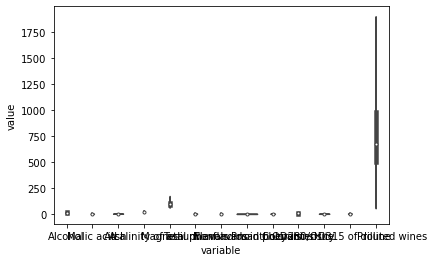

In [5]:
import seaborn as sns

sns.violinplot(data = df_long, x = 'variable', y = 'value')

Makes sense to normalise our data.

In [6]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()

# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_long = df_norm.melt(id_vars='Class label')
df_long

,Class label,variable,value
0,0.0,Alcohol,0.842105
1,0.0,Alcohol,0.571053
2,0.0,Alcohol,0.560526
3,0.0,Alcohol,0.878947
4,0.0,Alcohol,0.581579
...,...,...,...
2309,1.0,Proline,0.329529
2310,1.0,Proline,0.336662
2311,1.0,Proline,0.397290
2312,1.0,Proline,0.400856


<AxesSubplot:xlabel='variable', ylabel='value'>

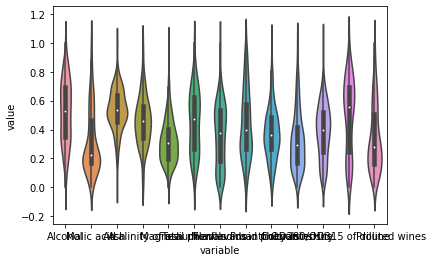

In [7]:
sns.violinplot(data = df_long, x = 'variable', y = 'value')

Are there any patterns?

How about a pairplot?

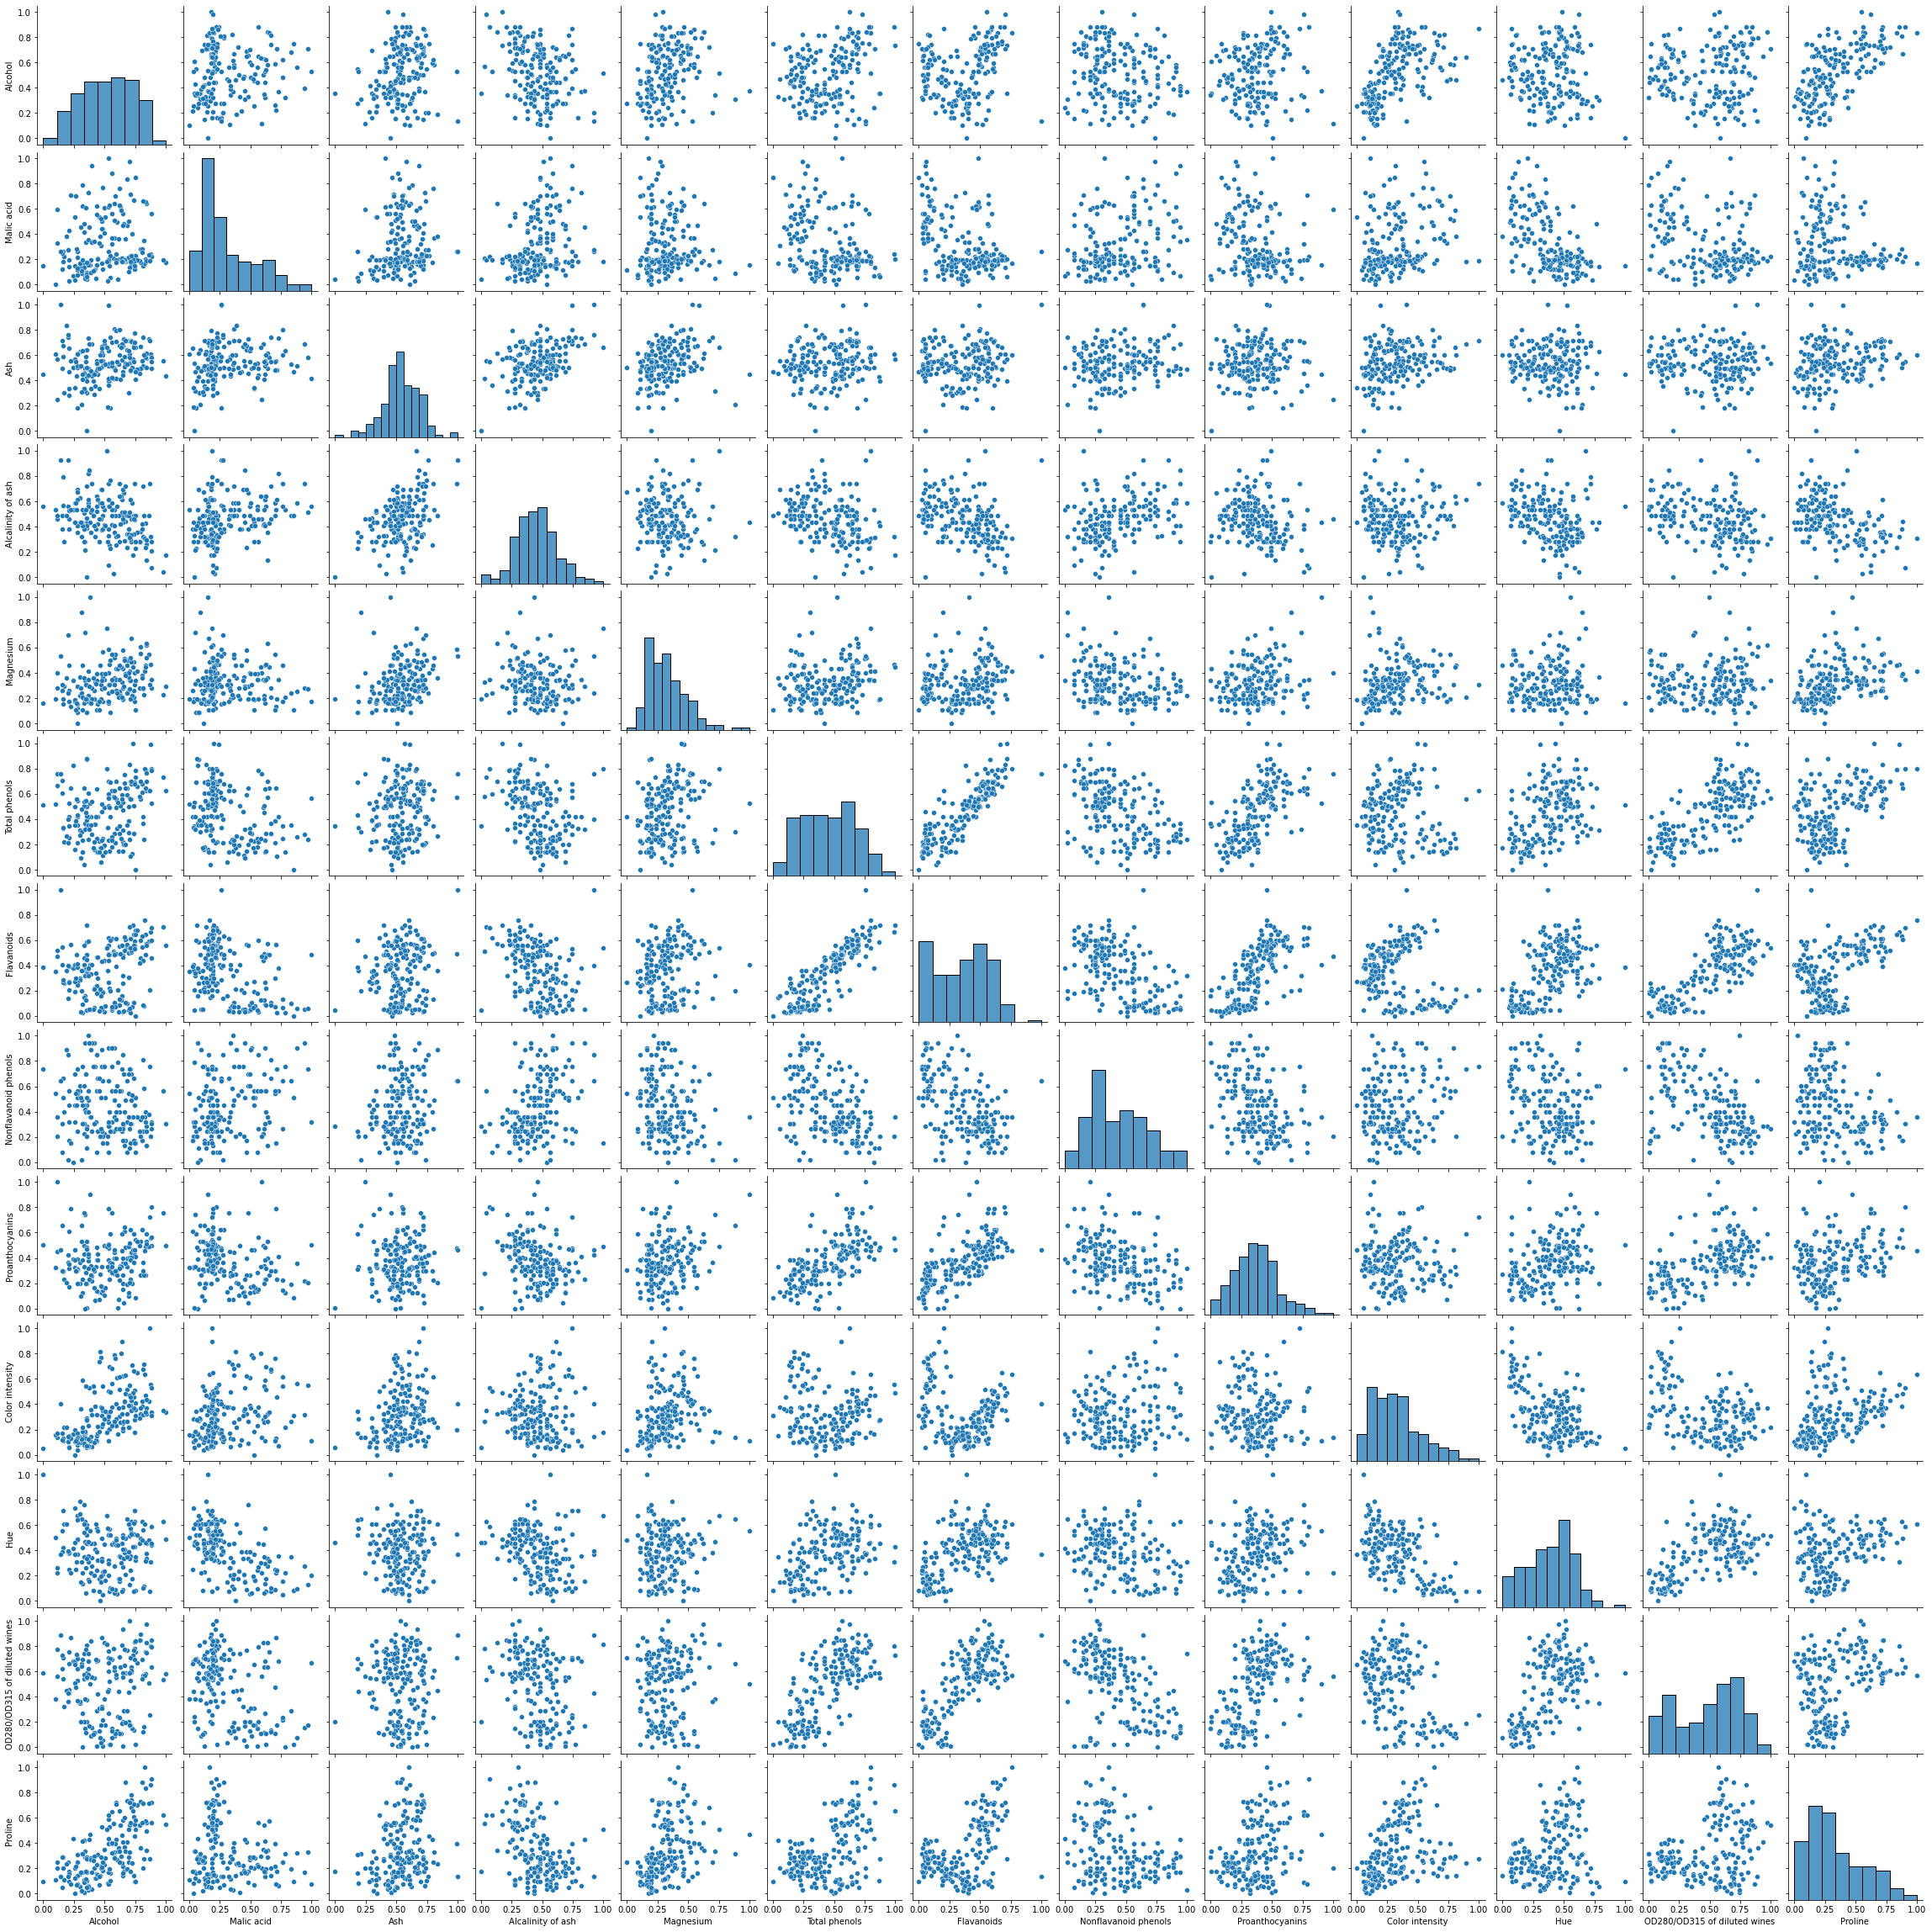

In [8]:
sns.pairplot(data = df_norm.iloc[:,1:])

Hmm, a few interesting correlations. Some of our variables are skewed. We could apply some PCA here to look at fewer dimension or even log transform some of the skewed variables.

For now we will just run a kmeans cluster and then check our results against the ground truth.

Lets decide how many clusters we need.

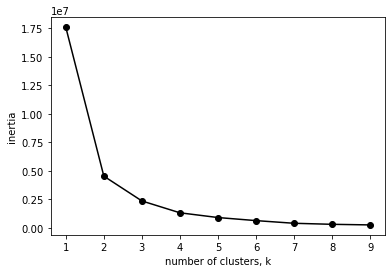

In [9]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df.iloc[:,1:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

import matplotlib.pyplot as plt

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

What happens if we use the normalised data instead?

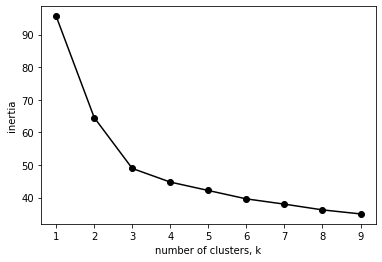

In [10]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_norm.iloc[:,1:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

import matplotlib.pyplot as plt

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Both of the graphs are the same. Is that what you would expect?

Three clusters seems about right (and matches our number of origonal labels).

In [11]:
df['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [12]:
# Create a KMeans instance with k clusters: model
k_means = KMeans(n_clusters=3)

# Fit model to samples
df_k_means = k_means.fit(df.iloc[:,1:])

df['Three clusters'] = pd.Series(df_k_means.predict(df.iloc[:,1:].values), index = df.index)
df

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Three clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


Do our cluster labels match our ground truth? Did our cluster model capture reality?

In [13]:
ct = pd.crosstab(df['Three clusters'], df['Class label'])
ct

Class label,1,2,3
Three clusters,,,
0,13,20,29
1,46,1,0
2,0,50,19


It might be easier to see as a stacked plot (see [this post](https://stackoverflow.com/questions/43544694/using-pandas-crosstab-with-seaborn-stacked-barplots)).

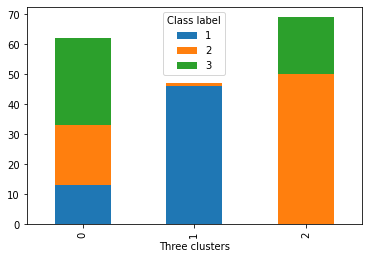

In [14]:
import matplotlib.pyplot as plt
import numpy as np

ct.plot.bar(stacked=True)
plt.legend(title='Class label')

How has the kmeans model done compared to our ground truth?

We need to be really careful here. We notice that it is not easily possible to compare the known class labels to clustering labels. The reason is that the clustering algorithm labels are just arbitrary and not assigned to any deterministic criteria. Each time you run the algorithm, you might get a different id for the labels. The reason is that the label itself doesn't actually mean anything, what is important is the list of items that are in the same cluster and their relations.

A way to come over this ambiguity and evaluate the results is to look at a visualisations of the results and compare. But this brings in the question of what type of visualisation to use for looking at the clusters. An immediate alternative is to use scatterplots. However, it is not clear which axis to use for clustering. A common method to apply at this stage is to make use of PCA to get a 2D plane where we can project the data points and visualise them over this projection.

In [15]:
df.iloc[:,1:14]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [16]:
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components=n_components)
df_pca = pca.fit(df.iloc[:,1:14])
df_pca_vals = df_pca.transform(df.iloc[:,1:14])

Grab our projections and plot along with our cluster names.

Text(0.5, 1.0, 'Known labels visualised over PCs')

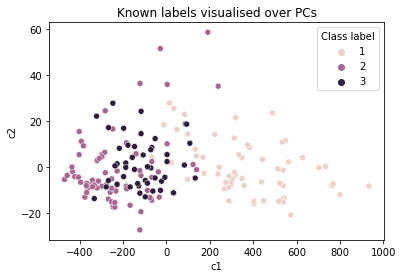

In [17]:
df['c1'] = [item[0] for item in df_pca_vals]
df['c2'] = [item[1] for item in df_pca_vals]

ax = sns.scatterplot(data = df, x = 'c1', y = 'c2', hue = 'Class label')
ax.set_title('Known labels visualised over PCs')

In the figure above, we colored the points based on the actual labels, we observe that there has been several misclassifications in the figure above (i.e., in the algorithm's results). So one may choose to use an alternative algorithm or devise a better distance metric.

Text(0.5, 1.0, 'Results of the algorithm visualised over PCs')

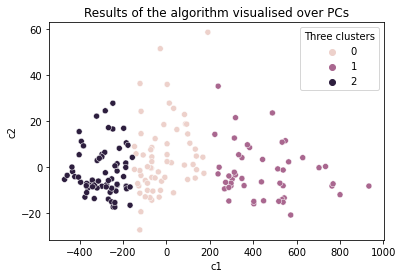

In [18]:
ax = sns.scatterplot(data = df, x = 'c1', y = 'c2', hue = 'Three clusters')
ax.set_title('Results of the algorithm visualised over PCs')

This shows the parallelism between the clustering algorithm and PCA. By looking at the PCA loadings, we can find out what the x-axis mean and try to interpret the clusters (We leave this as an additional exercise for those interested).

How might your interpret the above plots? Did the kmeans model identify the ground truth?

How robust is our clustering? It may be that the kmeans algorithm becamse stuck or that a few outliers have biased the clustering.

Two ways to check are:

* Running the model multiple times with different initial values.
* Removing some data and running the modelling multiple times.

Run the below cell a few times. What do you see?

Text(0.5, 1.0, 'Results of the algorithm visualised over PCs')

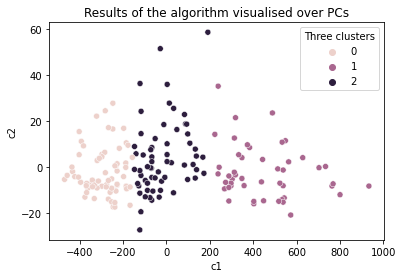

In [19]:
# Create a KMeans instance with k clusters: model
k_means = KMeans(n_clusters=3, init='random')

# Fit model to samples
df_k_means = k_means.fit(df.iloc[:,1:14])

df['Three clusters'] = pd.Series(df_k_means.predict(df.iloc[:,1:14].values), index = df.index)

ax = sns.scatterplot(data = df, x = 'c1', y = 'c2', hue = 'Three clusters')
ax.set_title('Results of the algorithm visualised over PCs')

How about with only 80% of the data?

Text(0.5, 1.0, 'Results of the algorithm visualised over PCs')

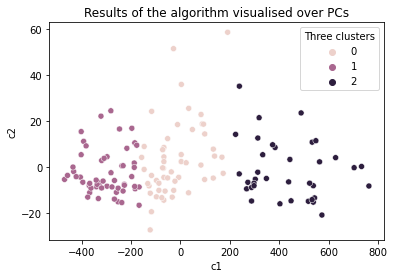

In [20]:
df_sample = df.sample(frac=0.8, replace=False)

# Create a KMeans instance with k clusters: model
k_means = KMeans(n_clusters=3, init='random')

# Fit model to samples
df_k_means = k_means.fit(df_sample.iloc[:,1:14])

df_sample['Three clusters'] = pd.Series(df_k_means.predict(df_sample.iloc[:,1:14].values), index = df_sample.index)

ax = sns.scatterplot(data = df_sample, x = 'c1', y = 'c2', hue = 'Three clusters')
ax.set_title('Results of the algorithm visualised over PCs')

We may want to automate the process of resampling the data or rerunning the model then perhaps plotting the different inertia values or creating different plots.

Do you think our clustering algorithm is stable and provide similiar results even when some data is removed or the initial values are random?

If so, then is our algorithm capturing the ground truth?